# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV,StratifiedKFold
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler,LabelEncoder
import plotly 
import plotly.express as px
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e7/test.csv')

train['is_train'] = 1
test['is_train'] = 0

combine = [train, test]
df = pd.concat(combine, axis=0)

In [3]:
print(train.shape)
print(test.shape)

(42100, 20)
(28068, 19)


In [4]:
df.isna().sum()

id                                          0
no_of_adults                                0
no_of_children                              0
no_of_weekend_nights                        0
no_of_week_nights                           0
type_of_meal_plan                           0
required_car_parking_space                  0
room_type_reserved                          0
lead_time                                   0
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                         0
repeated_guest                              0
no_of_previous_cancellations                0
no_of_previous_bookings_not_canceled        0
avg_price_per_room                          0
no_of_special_requests                      0
booking_status                          28068
is_train                                    0
dtype: int64

In [5]:
df.head(10)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_train
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0.0,1
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0.0,1
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0.0,1
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0.0,1
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1.0,1
5,5,0,2,2,5,0,0,2,215,2018,10,6,1,0,0,0,212.06,0,1.0,1
6,6,2,0,0,1,2,0,0,320,2018,8,18,0,0,0,0,115.00,1,1.0,1
7,7,2,0,0,2,2,0,0,265,2018,6,24,0,0,0,0,87.00,0,0.0,1
8,8,2,0,2,3,0,0,0,189,2018,10,8,0,0,0,0,72.75,0,0.0,1
9,9,3,0,0,3,0,0,0,137,2018,12,22,1,0,0,0,117.30,2,0.0,1


In [6]:
print('arrival_year: ', df['arrival_year'].unique(), '\n')
print('no_of_previous_cancellations: ', df['no_of_previous_cancellations'].unique(), '\n')
print('no_of_previous_bookings_not_canceledr: ', df['no_of_previous_bookings_not_canceled'].unique(), '\n')

arrival_year:  [2018 2017] 

no_of_previous_cancellations:  [11  0  1  4  2  3  8 13  6  5] 

no_of_previous_bookings_not_canceledr:  [ 0  2  3 23 47  7  8 14  4  6 13  1 12  5 33 16 18 10 11 27 17 21 30 43
 44 24 35 20  9 37 41 46 32 25 36 22 26 19 48 28 58 15 31 45 51 50 34 40] 



In [7]:
df.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_train
count,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,70168.000000,42100.000000,70168.000000
mean,35083.500000,1.918553,0.141004,0.886287,2.393826,0.237159,0.025952,0.429626,103.871038,2017.856459,7.589685,15.888824,0.727483,0.029800,0.021819,0.184158,104.597611,0.572497,0.392019,0.599989
std,20255.901181,0.525485,0.448987,0.882720,1.417731,0.585116,0.158993,0.831633,81.094971,0.350626,2.830386,8.906960,0.631735,0.170036,0.362130,1.818767,37.011164,0.772930,0.488207,0.489904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17541.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000
50%,35083.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000,1.000000
75%,52625.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000,1.000000
max,70167.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000,1.000000


In [8]:
corr= train.corr(method='pearson')['booking_status'][:]
corr

id                                      0.007264
no_of_adults                            0.079760
no_of_children                          0.004260
no_of_weekend_nights                    0.044279
no_of_week_nights                       0.058506
type_of_meal_plan                       0.045980
required_car_parking_space             -0.093262
room_type_reserved                     -0.023087
lead_time                               0.374865
arrival_year                            0.178326
arrival_month                           0.007639
arrival_date                            0.003124
market_segment_type                     0.112648
repeated_guest                         -0.136065
no_of_previous_cancellations           -0.045599
no_of_previous_bookings_not_canceled   -0.080166
avg_price_per_room                      0.157484
no_of_special_requests                 -0.220278
booking_status                          1.000000
is_train                                     NaN
Name: booking_status

<Axes: xlabel='arrival_date', ylabel='count'>

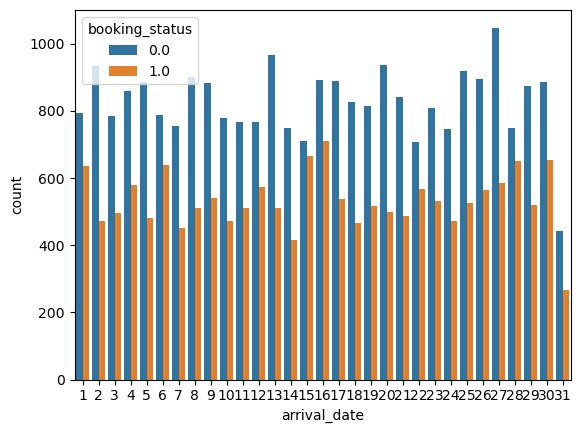

In [9]:
sns.countplot(data=df, x='arrival_date', hue='booking_status')

<Axes: xlabel='arrival_month', ylabel='count'>

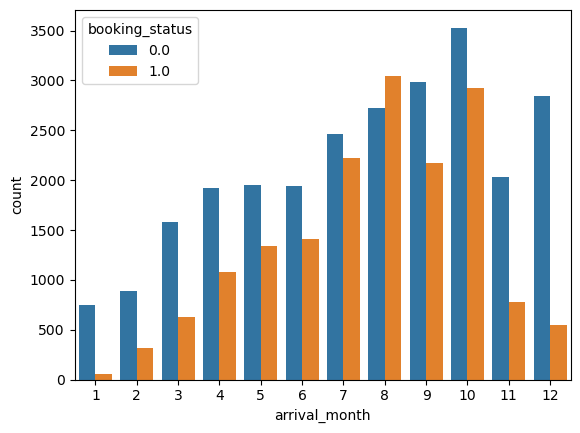

In [10]:
sns.countplot(data=df, x='arrival_month', hue='booking_status')

<Axes: xlabel='arrival_year', ylabel='count'>

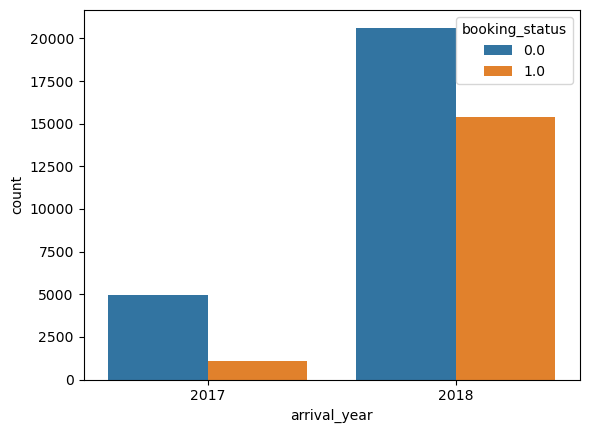

In [11]:
sns.countplot(data=df, x='arrival_year', hue='booking_status')

<Axes: xlabel='no_of_special_requests', ylabel='count'>

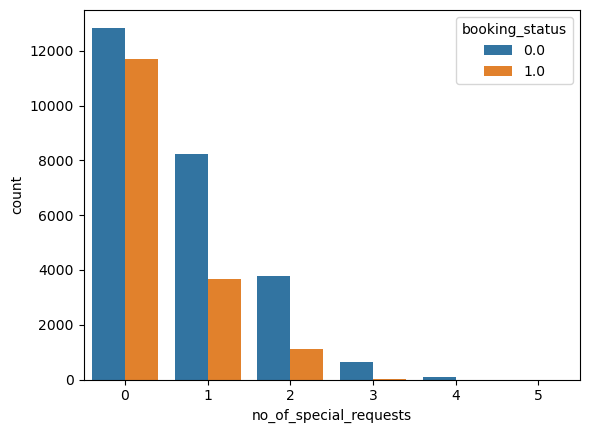

In [12]:
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status')

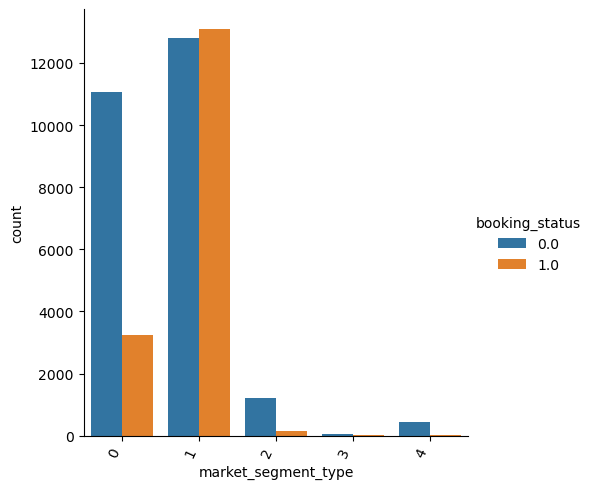

In [13]:
chart = sns.catplot(data=df, x='market_segment_type', kind='count', hue='booking_status')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

In [14]:
df['arrival_year']=df.arrival_year.map({2017:int(0), 2018:int(1)})

# Feature Engineering

In [15]:
def SumFunc(df, col, name):
    df[name] = df[col].sum(axis=1) 
    return df

In [16]:
cols_name = ['no_of_adults','no_of_children']
name = 'family'

df = SumFunc(df, cols_name, name)

In [17]:
cols_name = ['no_of_weekend_nights','no_of_week_nights']
name = 'no_of_nights'

df = SumFunc(df, cols_name, name)

In [18]:
df['market_segment_Band'] = pd.cut(df['market_segment_type'], 2)
df[['market_segment_Band', 'booking_status']].groupby(['market_segment_Band'], as_index=False).mean().sort_values(by='booking_status', ascending=False)

,market_segment_Band,booking_status
0,"(-0.004, 2.0]",0.396368
1,"(2.0, 4.0]",0.047619


In [19]:
df['market_segment_Band'] = pd.cut(df['market_segment_type'], 2, labels=[0, 1])

In [20]:
df['price_per_room_Band'] = pd.cut(df['avg_price_per_room'], 7)
df[['price_per_room_Band', 'booking_status']].groupby(['price_per_room_Band'], as_index=False).mean().sort_values(by='booking_status', ascending=False)

,price_per_room_Band,booking_status
6,"(462.857, 540.0]",0.800000
3,"(231.429, 308.571]",0.460606
1,"(77.143, 154.286]",0.456734
2,"(154.286, 231.429]",0.376181
4,"(308.571, 385.714]",0.333333
0,"(-0.54, 77.143]",0.200591
5,"(385.714, 462.857]",NaN


In [21]:
df['price_per_room_Band'] = pd.cut(df['avg_price_per_room'], 7, labels=[0,1,2,3,4,5,6])

In [22]:
def scale_features(df):
    for col in df.columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            continue
        df[col] = df[col] / np.max(df[col])
    return df

df = scale_features(df)

In [23]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_train,family,no_of_nights,market_segment_Band,price_per_room_Band
0,0.000000,0.50,0.0,0.000000,0.117647,0.333333,0.0,0.0,0.020316,1.0,...,0.846154,0.0,0.125000,0.0,0.0,1.0,0.181818,0.086957,0,0
1,0.000014,0.50,0.0,0.142857,0.117647,0.000000,0.0,0.0,0.264108,1.0,...,0.000000,0.0,0.133796,0.0,0.0,1.0,0.181818,0.130435,0,0
2,0.000029,0.50,0.0,0.000000,0.058824,0.000000,0.0,0.0,0.711061,1.0,...,0.000000,0.0,0.096296,0.0,0.0,1.0,0.181818,0.043478,0,0
3,0.000043,0.25,0.0,0.000000,0.117647,0.333333,0.0,0.0,0.072235,1.0,...,0.000000,0.0,0.103704,0.0,0.0,1.0,0.090909,0.086957,0,0
4,0.000057,0.50,0.0,0.142857,0.000000,0.000000,0.0,0.0,0.582393,1.0,...,0.000000,0.0,0.185185,0.0,1.0,1.0,0.181818,0.043478,0,1


In [24]:
df = df.drop(['id'], axis=1)

In [25]:
train = df[df['is_train'] == 1]
test = df[df['is_train'] == 0]

# Model Training

In [26]:
from sklearn.model_selection import train_test_split

X_train = train.drop('booking_status', axis=1)
y_train = train['booking_status']
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size=0.33, random_state=44, shuffle =True)

In [27]:
LR = LogisticRegression(penalty='l2',solver='saga',C=0.5,random_state=1, tol = 0.001, max_iter=5000)
LR.fit(X_train, y_train)

print('LogisticRegression Train Score is : ' , LR.score(train_X, train_y))
print('LogisticRegression Test Score is : ', LR.score(test_X, test_y))

LogisticRegression Train Score is :  0.7691707732123232
LogisticRegression Test Score is :  0.7760023033182178


In [28]:
c = SGDClassifier(loss='log', penalty='l2', max_iter=1000, tol=1e-7, random_state=33)
c.fit(X_train, y_train)

print('SGDClassifier Train Score is : ', c.score(train_X, train_y))
print('SGDClassifier Test Score is : ', c.score(test_X, test_y))

SGDClassifier Train Score is :  0.7671854504201084
SGDClassifier Test Score is :  0.7733390916288778


In [29]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

print('KNeighborsClassifier Train Score is : ', knn.score(train_X, train_y))
print('KNeighborsClassifier Test Score is : ', knn.score(test_X, test_y))

KNeighborsClassifier Train Score is :  0.9867763321161414
KNeighborsClassifier Test Score is :  0.9863960267760743


In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

print('DecisionTreeClassifier Train Score is : ', decision_tree.score(train_X, train_y))
print('DecisionTreeClassifier Test Score is : ', decision_tree.score(test_X, test_y))

DecisionTreeClassifier Train Score is :  0.9868117843088595
DecisionTreeClassifier Test Score is :  0.9863240480817678


In [31]:
random_forest = RandomForestClassifier(n_estimators=2000)
random_forest.fit(X_train, y_train)

print('RandomForestClassifier Train Score is : ', random_forest.score(train_X, train_y))
print('RandomForestClassifier Test Score is : ', random_forest.score(test_X, test_y))

RandomForestClassifier Train Score is :  0.9864218101889601
RandomForestClassifier Test Score is :  0.9871158137191391
